In [1]:
import mlflow 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 


/Users/arpitgupta/Desktop/MLOPS+LLMOPS/MLOPS-LLMOPS/.venv/lib/python3.11/site-packages/mlflow/utils/requirements_utils.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # noqa: TID251


In [4]:
df = pd.read_csv("/Users/arpitgupta/Desktop/MLOPS+LLMOPS/MLOPS-LLMOPS/notebooks/Crop_recommendation.csv")

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.isnull().sum()
df.shape
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

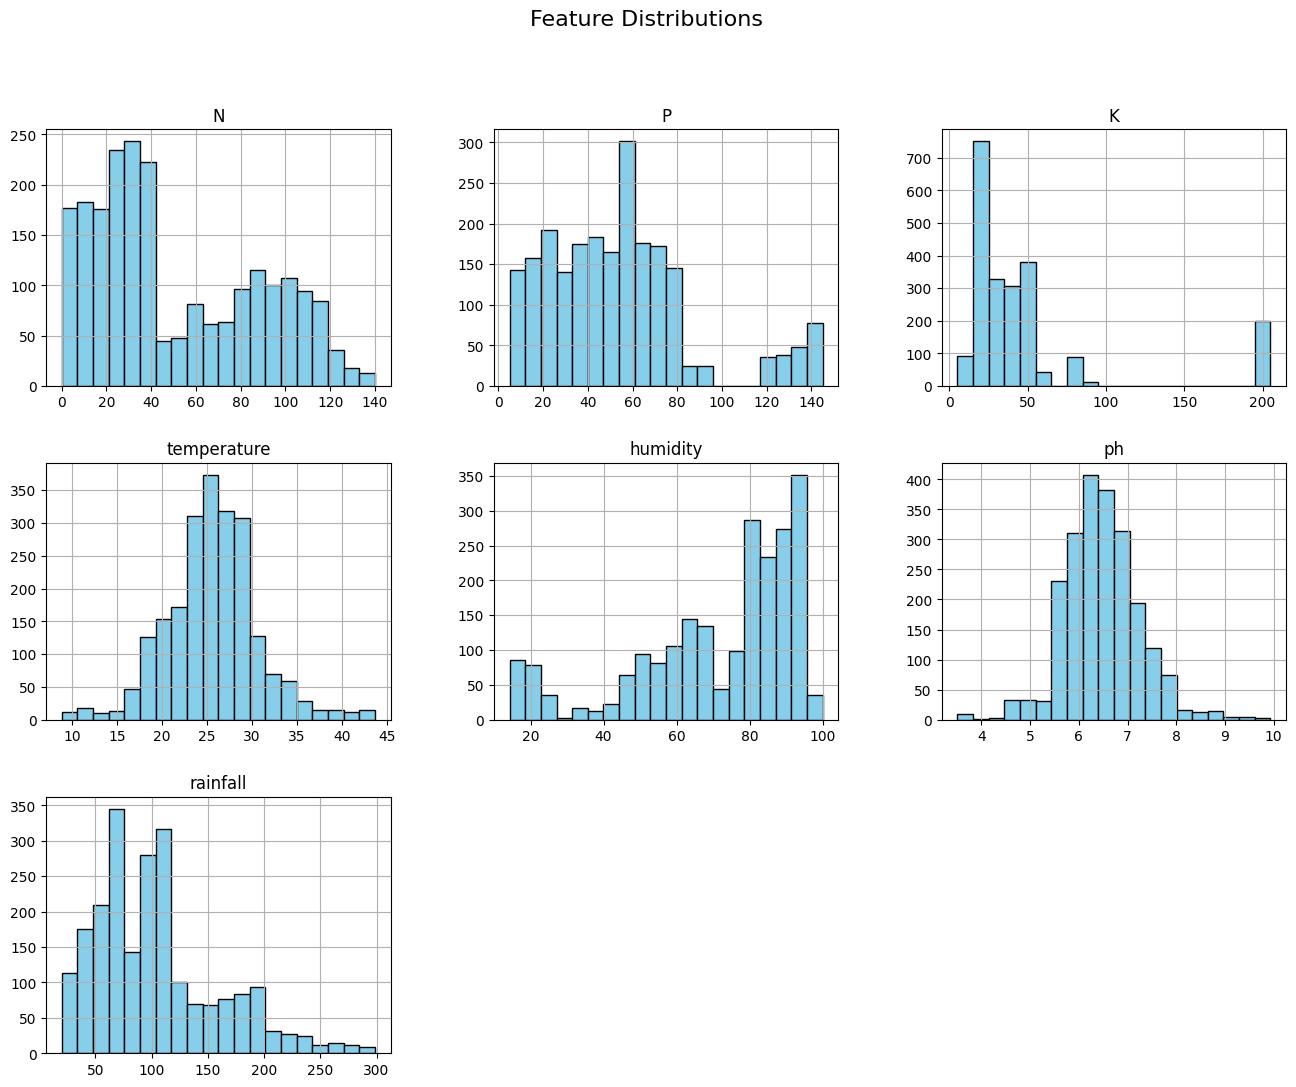

In [12]:
df.drop('label', axis=1).hist(figsize=(16,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

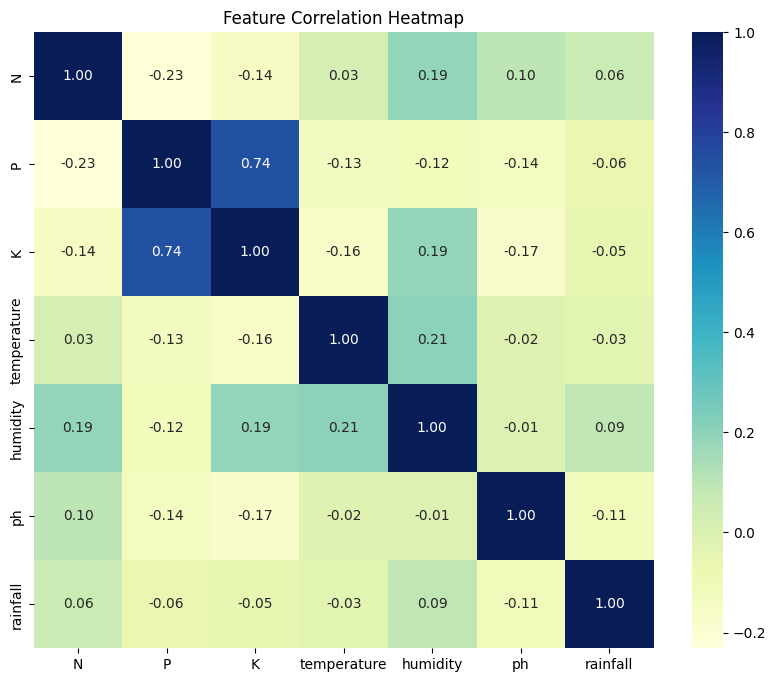

In [14]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## feature Engineering 

In [15]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler 
from sklearn.model_selection import train_test_split 
# from sklearn.model_training import train_test_split
X = df.drop('label' , axis = 1)
y = df['label']

labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y)


X_train , X_test , y_train, y_test = train_test_split(X , y_encoded , test_size = 0.2 , random_state = 42)
# normalize the feature 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training

In [16]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train_scaled,y_train)

predict = DecisionTree.predict(X_test_scaled)

x = accuracy_score(y_test, predict)
print(x)



0.865909090909091


In [23]:
# hyper-params tuning 
from sklearn.model_selection import cross_val_score 

score = cross_val_score(DecisionTree, X, y_encoded ,cv = 5)

score 

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naiveBayes = GaussianNB()


naiveBayes.fit(X_train_scaled ,y_train)

predicted_values = naiveBayes.predict(X_test_scaled)
x = accuracy_score(y_test, predicted_values)
print(x)


0.9954545454545455


In [50]:
import dagshub 
import mlflow 


mlflow.set_tracking_uri('https://dagshub.com/thearpitgupta2003/MLOPS-LLMOPS.mlflow')
dagshub.init(repo_owner='thearpitgupta2003', repo_name='MLOPS-LLMOPS', mlflow=True)


mlflow.set_experiment('Naive Bayes Crop analysis ')


Initialized MLflow to track repo "thearpitgupta2003/MLOPS-LLMOPS"

2025-10-25 18:51:54,564 - INFO - Initialized MLflow to track repo "thearpitgupta2003/MLOPS-LLMOPS"


Repository thearpitgupta2003/MLOPS-LLMOPS initialized!

2025-10-25 18:51:54,566 - INFO - Repository thearpitgupta2003/MLOPS-LLMOPS initialized!


<Experiment: artifact_location='mlflow-artifacts:/8b9637c5075843d4b544e04c4d8d28e6', creation_time=1761395431897, experiment_id='0', last_update_time=1761395431897, lifecycle_stage='active', name='Naive Bayes Crop analysis ', tags={}>

In [59]:
import mlflow 
import logging
import os 
import time 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

params = {
    "test_size" : 0.2,
    # "alpha" : 0.1
}
mlflow.set_experiment("Decision Tree ")
logging.info("start the ml-flow runs ")

with mlflow.start_run(nested = True) as run:
    # start_time  = time.time
    try: 
        logging.info("logging the params")
        mlflow.log_params(params)

        logging.info("trained the naive Bayees ")
        DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

        logging.info("Fitting the model...")
        DecisionTree.fit(X_train_scaled, y_train)
        logging.info("Model training complete.")

        logging.info("Logging model parameters...")
        mlflow.log_param("DecisionTree", "Decision Tree")

        logging.info("make predictions")
        predicted_values = DecisionTree.predict(X_test_scaled)

        logging.info("Calculating evaluation metrics...")
        accuracy = accuracy_score(y_test, predicted_values)
        precision = precision_score(y_test, predicted_values, average='weighted')
        recall = recall_score(y_test, predicted_values,average='weighted')
        f1 = f1_score(y_test, predicted_values,average='weighted')


        logging.info("Logging evaluation metrics...")
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        logging.info("Saving and logging the model...")
        mlflow.sklearn.log_model(DecisionTree, "Decision Tree")
        # Log execution time
        # end_time = time.time()
        # logging.info(f"Model training and logging completed in {seconds.")

        notebook_path = "mlflow_sample.ipynb"
        mlflow.log_artifact(notebook_path)

        logging.info(f"Accuracy: {accuracy}")
        logging.info(f"Precision: {precision}")
        logging.info(f"Recall: {recall}")
        logging.info(f"F1 Score: {f1}")

    except Exception as e:
        logging.error(f"An error occurred: {e}", exc_info=True)





        




2025/10/25 19:16:56 INFO mlflow.tracking.fluent: Experiment with name 'Decision Tree ' does not exist. Creating a new experiment.
2025-10-25 19:16:58,182 - INFO - start the ml-flow runs 
2025-10-25 19:16:58,587 - INFO - logging the params
2025-10-25 19:16:58,966 - INFO - trained the naive Bayees 
2025-10-25 19:16:58,973 - INFO - Fitting the model...
2025-10-25 19:16:59,001 - INFO - Model training complete.
2025-10-25 19:16:59,002 - INFO - Logging model parameters...
2025-10-25 19:16:59,403 - INFO - make predictions
2025-10-25 19:16:59,408 - INFO - Calculating evaluation metrics...
/Users/arpitgupta/Desktop/MLOPS+LLMOPS/MLOPS-LLMOPS/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2025-10-25 19:16:59,419 - INFO - Logging evaluation metrics...
202

In [58]:
import mlflow 
import logging
import os 
import time 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

params = {
    "test_size" : 0.2,
    # "alpha" : 0.1
}

logging.info("start the ml-flow runs ")

# with mlflow.start_run") as parent_run:
    # start_time  = time.time
try: 
        logging.info("logging the params")
        mlflow.log_params(params)

        logging.info("trained the naive Bayees ")
        naiveBayes = GaussianNB()

        logging.info("Fitting the model...")
        naiveBayes.fit(X_train_scaled, y_train)
        logging.info("Model training complete.")

        logging.info("Logging model parameters...")
        mlflow.log_param("naiveBayes", "Naive Bayes")

        logging.info("make predictions")
        predicted_values = naiveBayes.predict(X_test_scaled)

        logging.info("Calculating evaluation metrics...")
        accuracy = accuracy_score(y_test, predicted_values)
        precision = precision_score(y_test, predicted_values, average='weighted')
        recall = recall_score(y_test, predicted_values,average='weighted')
        f1 = f1_score(y_test, predicted_values,average='weighted')


        logging.info("Logging evaluation metrics...")
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        logging.info("Saving and logging the model...")
        mlflow.sklearn.log_model(naiveBayes, "naiveBayes")
        # Log execution time
        # end_time = time.time()
        # logging.info(f"Model training and logging completed in {seconds.")

        notebook_path = "mlflow_sample.ipynb"
        mlflow.log_artifact(notebook_path)

        logging.info(f"Accuracy: {accuracy}")
        logging.info(f"Precision: {precision}")
        logging.info(f"Recall: {recall}")
        logging.info(f"F1 Score: {f1}")

except Exception as e:
        logging.error(f"An error occurred: {e}", exc_info=True)





        




2025-10-25 19:15:49,216 - INFO - start the ml-flow runs 
2025-10-25 19:15:49,219 - INFO - logging the params
2025-10-25 19:15:49,586 - INFO - trained the naive Bayees 
2025-10-25 19:15:49,588 - INFO - Fitting the model...
2025-10-25 19:15:49,596 - INFO - Model training complete.
2025-10-25 19:15:49,596 - INFO - Logging model parameters...
2025-10-25 19:15:49,976 - INFO - make predictions
2025-10-25 19:15:49,983 - INFO - Calculating evaluation metrics...
2025-10-25 19:15:49,988 - INFO - Logging evaluation metrics...
2025-10-25 19:15:51,719 - INFO - Saving and logging the model...
/Users/arpitgupta/Desktop/MLOPS+LLMOPS/MLOPS-LLMOPS/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2025/10/25 19:15:54 